In [ ]:
!mkdir-p ~/.kaggle
!cp kaggle.json ~/.kaggle/


/bin/bash: line 1: mkdir-p: command not found
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization,Dropout

In [ ]:
#generator
train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


validation_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN Model

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='valid', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_2 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_3 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 99ms/step - loss: 0.8582 - accuracy: 0.5853 - val_loss: 0.6781 - val_accuracy: 0.5534
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.6158 - accuracy: 0.6539 - val_loss: 0.6389 - val_accuracy: 0.6286
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5658 - accuracy: 0.6971 - val_loss: 0.5992 - val_accuracy: 0.6852
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4990 - accuracy: 0.7551 - val_loss: 0.6497 - val_accuracy: 0.6774
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4417 - accuracy: 0.7914 - val_loss: 0.4743 - val_accuracy: 0.7828
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3888 - accuracy: 0.8247 - val_loss: 0.4888 - val_accuracy: 0.7894
Epoch 7/10
625/625 [==============================] - 82s 131ms/step - loss: 0.3319 - accuracy: 0.8512 - val_loss: 0.5183 - val_acc

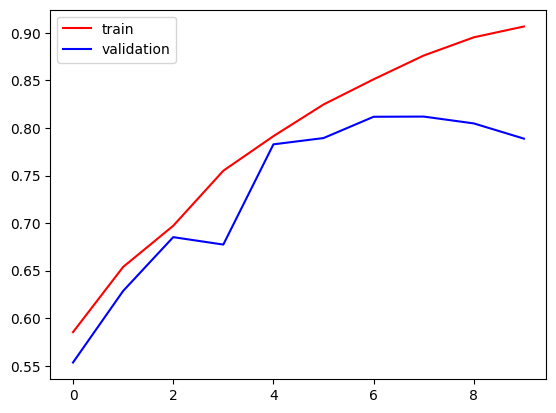

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

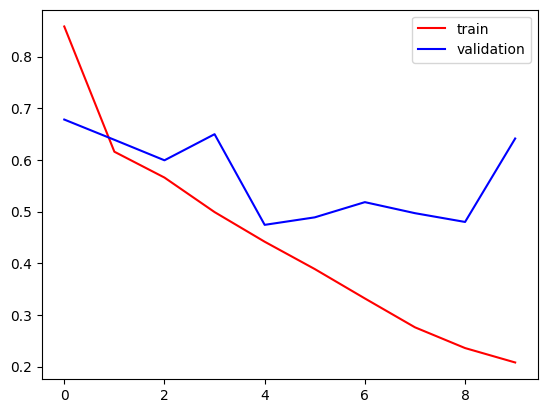

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

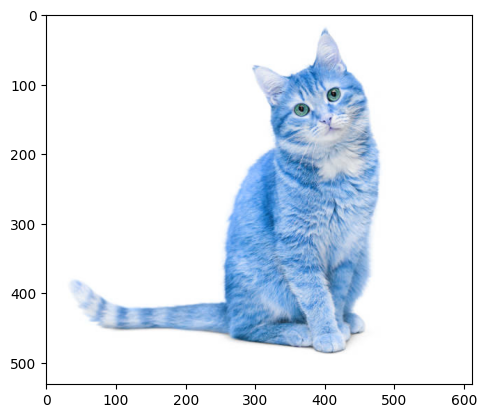

In [ ]:
test_img=cv2.imread('/content/cat-1443562748-612x612.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_img=cv2.resize(test_img, (256,256))
test_result= test_img.reshape(1,256,256,3)
model.predict(test_result)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)